In [211]:
import os
import numpy as np
import pylab as pl
import zipfile
import pandas as pd
import geopandas as gp
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster as scp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#!for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

In [ ]:
#!for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

In [ ]:
#!for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

In [ ]:
#!for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

In [46]:
#os.system("mv *.zip $PUIDATA")

#path  = os.getenv("PUIDATA") + '/'
biz = pd.DataFrame()

#### The code to extract and prepare  the census business data was the joint product of collaboration between everyone mentioned in the README.md

In [47]:
for i in np.arange(0,15):
    if i < 10:
        set = '0' + str(i)
    else:
        set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df['year'] = int('20' + set)
    biz = biz.append(df)

In [48]:
for i in np.arange(94, 100):
    set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df['year'] = int('19' + set)
    biz = biz.append(df)

In [57]:
biz['zip'] = pd.to_numeric(biz['zip'], errors = 'coerce')
print len(biz)
print biz.columns
biz.head()

828791
Index([u'ap', u'ap_nf', u'city', u'cty_name', u'emp', u'emp_nf', u'empflag',
       u'est', u'name', u'qp1', u'qp1_nf', u'stabbr', u'year', u'zip'],
      dtype='object')


,ap,ap_nf,city,cty_name,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,year,zip
0,0,NaN,NaN,NaN,0,NaN,A,1,"HOLTSVILLE, NY",0,NaN,NaN,2000,501
1,259661,NaN,NaN,NaN,8042,NaN,NaN,493,"AGAWAM, MA",59833,NaN,NaN,2000,1001
2,169658,NaN,NaN,NaN,6547,NaN,NaN,563,"AMHERST, MA",36719,NaN,NaN,2000,1002
3,2482,NaN,NaN,NaN,82,NaN,NaN,13,"AMHERST, MA",308,NaN,NaN,2000,1003
4,5826,NaN,NaN,NaN,717,NaN,NaN,48,"AMHERST, MA",2049,NaN,NaN,2000,1004


In [60]:
biz = biz[['zip', 'est', 'year']]
biz.head()

,zip,est,year
0,501,1,2000
1,1001,493,2000
2,1002,563,2000
3,1003,13,2000
4,1004,48,2000


In [64]:
est = pd.pivot_table(biz, index=["zip"], columns=["year"], values=["est"], aggfunc=[np.sum],fill_value=0)
print (len(est))
est.head()

42671


sum                                              ...                  \
      est                                              ...                   
year 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 ...  2005 2006 2007   
zip                                                    ...                   
501     0    2    4    4    3    2    1    6   11    7 ...     2    8    5   
1000    0    4   11    8    0    0    0    0    0    0 ...     0    0    0   
1001  439  439  433  457  444  469  493  490  490  505 ...   509  509  503   
1002  450  467  487  500  490  558  563  587  566  586 ...   589  582  596   
1003   10   10   13   15   14   13   13   13   15   16 ...    12   12   16   

                                         
                                         
year 2008 2009 2010 2011 2012 2013 2014  
zip                                      
501     3    2    2    2    2    2    4  
1000    0    0    0    0    0    0    0  
1001  477  458  448  436  453  439  458  
1002  584  571  570  558  572  572  560  
1003   17   16   16   16   15   15   18  

[5 rows x 21 columns]

## NYC Zipcodes Shapefile

In [11]:
url = "https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW11_fb55/nyc-zip-code-tabulation-areas-polygons.geojson"
os.system("curl -O " + url)
os.system("mv nyc-zip-code-tabulation-areas-polygons.geojson " + os.getenv("PUIDATA") + "/zipcodes.geojson")

0

In [34]:
zipcodes = gp.read_file(os.getenv("PUIDATA") + "/zipcodes.geojson")
#zipcodes.head()

In [51]:
zipcodes = zipcodes[['geometry', 'postalCode']]
zipcodes.rename(columns = {'postalCode':'zip'}, inplace=True)
print (len(zipcodes))
zipcodes.head()

262


,geometry,zip
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [74]:
zipcodes['zip'] = pd.to_numeric(zipcodes['zip'], errors = 'coerce')

In [80]:
# use the merge to whittle business data down to NYC zipcodes
nyc_biz = pd.merge(biz, zipcodes, on='zip', how='right')
print (len(nyc_biz))
nyc_biz.head()

5305


,zip,est,year,geometry
0,10001.0,7317.0,2000.0,POLYGON ((-74.00827017711134 40.75258714368449...
1,10001.0,7188.0,2001.0,POLYGON ((-74.00827017711134 40.75258714368449...
2,10001.0,7141.0,2002.0,POLYGON ((-74.00827017711134 40.75258714368449...
3,10001.0,7084.0,2003.0,POLYGON ((-74.00827017711134 40.75258714368449...
4,10001.0,7370.0,2004.0,POLYGON ((-74.00827017711134 40.75258714368449...


In [85]:
nyc_biz = pd.pivot_table(nyc_biz, index=['zip'], columns=['year'], \
                         values=['est'], aggfunc=[np.sum], fill_value=0)

In [88]:
print (len(nyc_biz))
nyc_biz.head()

244


sum                                                                 \
           est                                                                  
year    1994.0 1995.0 1996.0 1997.0 1998.0 1999.0 2000.0 2001.0 2002.0 2003.0   
zip                                                                             
10001.0   6999   7088   7075   7154   7254   7233   7317   7188   7141   7084   
10002.0   1784   1819   1919   2049   2003   2085   2277   2543   2269   2402   
10003.0   3256   3377   3417   3535   3649   3659   3683   3602   3616   3704   
10004.0   4460   4496   4532   4692   4704   4932   5176   4988   5012   5008   
10005.0   1076   1109   1216   1227   1270   1242   1287   1249   1244   1200   

         ...                                                                   \
         ...                                                                    
year     ...   2005.0 2006.0 2007.0 2008.0 2009.0 2010.0 2011.0 2012.0 2013.0   
zip      ...                                                                    
10001.0  ...     7312   7415   7549   7472   7305   7241   7227   7235   7273   
10002.0  ...     2682   2686   2685   2691   2775   2872   2912   2954   2988   
10003.0  ...     3867   3909   4049   4071   4099   4113   4159   4214   4277   
10004.0  ...     5040   5244   5480   5504   5516   5592   5616   5768   5916   
10005.0  ...     1214   1259   1273   1291   1274   1266   1301   1273   1296   

                
                
year    2014.0  
zip             
10001.0   7369  
10002.0   2972  
10003.0   4333  
10004.0   6216  
10005.0   1321  

[5 rows x 21 columns]

In [93]:
# code from Ben Alpert
pivotpath = nyc_biz['sum']['est']
print (pivotpath.shape)
pivotpath[1994].head()

(244, 21)


zip
10001.0    6999
10002.0    1784
10003.0    3256
10004.0    4460
10005.0    1076
Name: 1994.0, dtype: int64

In [106]:
means = pivotpath.mean(axis=1)
stdev = pivotpath.std(axis=1)
vals = pd.DataFrame([means, stdev]).transpose()
vals.rename(columns={0:'means', 1:'stdev'}, inplace=True)

In [109]:
nyc_biz = pd.merge(pivotpath, vals, how='inner', left_index=True, right_index=True)
nyc_biz.head(2)

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,means,stdev
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7549,7472,7305,7241,7227,7235,7273,7369,7252.428571,137.793531
10002.0,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2685,2691,2775,2872,2912,2954,2988,2972,2472.285714,401.674637


## Normalize the data by subtracting the mean and dividing by the standard deviation

In [111]:
normed = nyc_biz
for year in range(1994, 2015):
    normed[year] = (normed[year] - normed.means) / normed.stdev
normed.drop(['means', 'stdev'], inplace=True, axis=1)
normed.head()

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986
10002.0,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077
10003.0,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833
10004.0,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945
10005.0,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888


### Cluster the number of establishments with K-Means. Plot the cluster centers

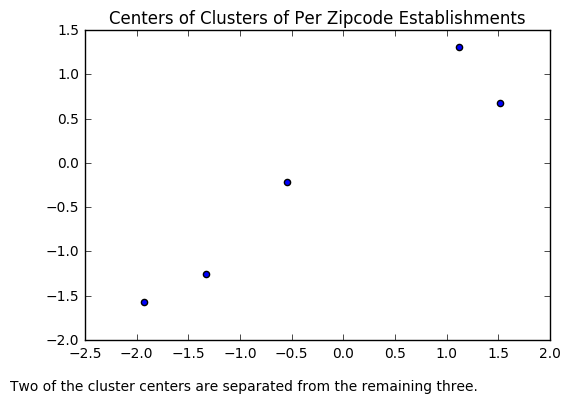

In [155]:
# This was my own attempt to create the clusters
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit(normed)
clusters
centroid = clusters.cluster_centers_
centroid
pl.scatter(centroid[:, 0], centroid[:, 1])
pl.title("Centers of Clusters of Per Zipcode Establishments")
pl.figtext(0, 0, "Two of the cluster centers are separated from the remaining three.")

### Code from Ben Alpert

In [165]:
#https://www.codementor.io/python/tutorial/data-science-python-pandas-r-dimensionality-reduction
pca = PCA(n_components=2)
pca.fit(normed)
existing_2d = pca.transform(normed)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = normed.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
zip,,
10001.0,0.211570,-1.689967
10002.0,-1.733828,-0.658795
10003.0,-1.802235,-0.117563
10004.0,-1.727577,0.089365
10005.0,-0.374806,-1.334768


In [166]:
print(pca.explained_variance_ratio_) 


[ 0.58005618  0.14818863]


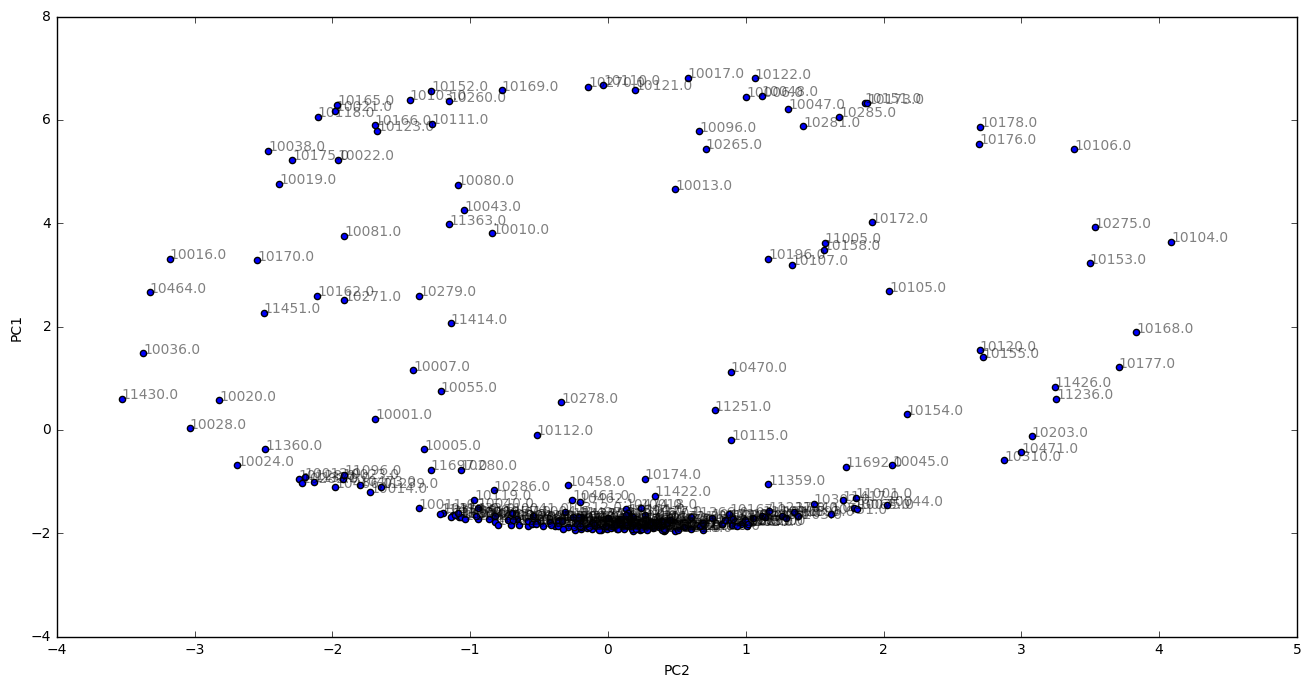

In [178]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(normed.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1), alpha=0.5)

In [186]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(normed)
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
centroids = clusters.cluster_centers_

In [187]:
centroids

array([[-1.43050709, -1.31071953, -1.16966688, -0.9712057 , -0.85940956,
        -0.78187343, -0.6357521 , -0.57364029, -0.2137471 , -0.07716199,
         0.11187019,  0.21938384,  0.26757954,  0.43953259,  0.52126779,
         0.60752414,  0.81213852,  0.95925188,  1.13167244,  1.36984801,
         1.58361473],
       [ 0.09309971,  0.40817872,  0.54433857,  0.72933072,  0.82450875,
         0.69703423,  1.00967426,  0.83744631,  0.19630248,  0.12851654,
         0.21108772,  0.0551227 , -0.04365173, -0.28859057, -0.49159021,
        -0.61822809, -0.74198659, -0.96951073, -0.88710046, -0.84679937,
        -0.84718297],
       [ 1.50214955,  0.71011651,  0.18083653, -0.29480822, -0.4781221 ,
        -0.06228334, -0.39232847, -0.45781832, -0.75447484, -0.86683306,
        -0.54167087, -0.2143284 , -0.43579615, -0.14724528, -0.18770545,
        -0.06012661,  0.10150961,  0.24103842,  0.59289705,  0.65446637,
         0.91052707]])

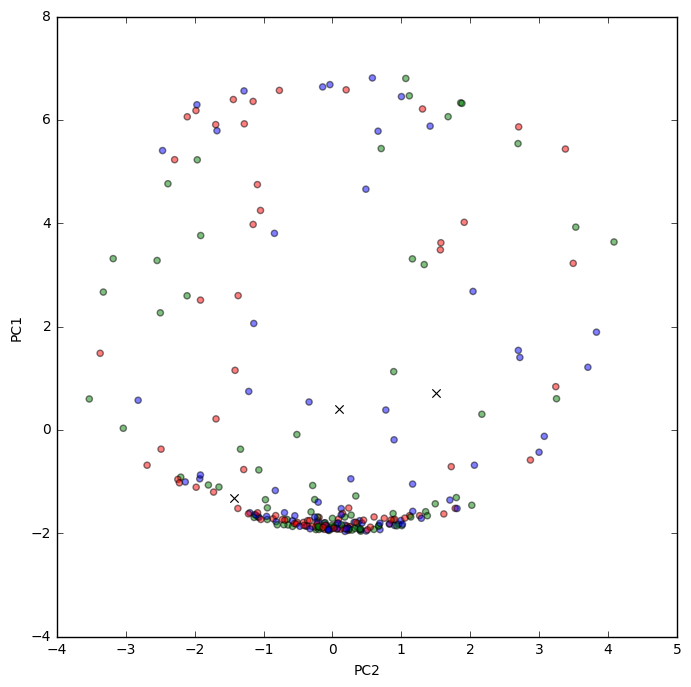

In [199]:
existing_df_2d.plot(kind='scatter', x='PC2',y='PC1', c=('r', 'g', 'b'), figsize=(8,8), alpha=0.5)

for x in centroids:
    pl.plot(centroids[:,0], centroids[:,1], 'kx', )

In [201]:
zipcodes = zipcodes.set_index('zip')

In [202]:
norm_shapes = pd.merge(normed, zipcodes, left_index='true', right_index='true', how='inner')
norm_shapes_clusters = pd.merge(norm_shapes, existing_df_2d, left_index='true', right_index='true', how='inner')
norm_shapes_clusters.columns

Index([     1994.0,      1995.0,      1996.0,      1997.0,      1998.0,
            1999.0,      2000.0,      2001.0,      2002.0,      2003.0,
            2004.0,      2005.0,      2006.0,      2007.0,      2008.0,
            2009.0,      2010.0,      2011.0,      2012.0,      2013.0,
            2014.0, u'geometry',      u'PC1',      u'PC2',  u'cluster'],
      dtype='object', name=u'year')

In [203]:
norm_shapes.head(2)

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,geometry
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,1.179819,2.152288,1.593481,0.381523,-0.08294,-0.184541,-0.126483,0.149292,0.845986,POLYGON ((-74.00827017711134 40.75258714368449...
10002.0,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.532058,0.529569,0.544506,0.753631,0.99512,1.094703,1.199265,1.283911,1.244077,POLYGON ((-73.97441674489379 40.73642441865476...


In [205]:
geo_df = gp.GeoDataFrame(norm_shapes_clusters, geometry=norm_shapes_clusters['geometry'])

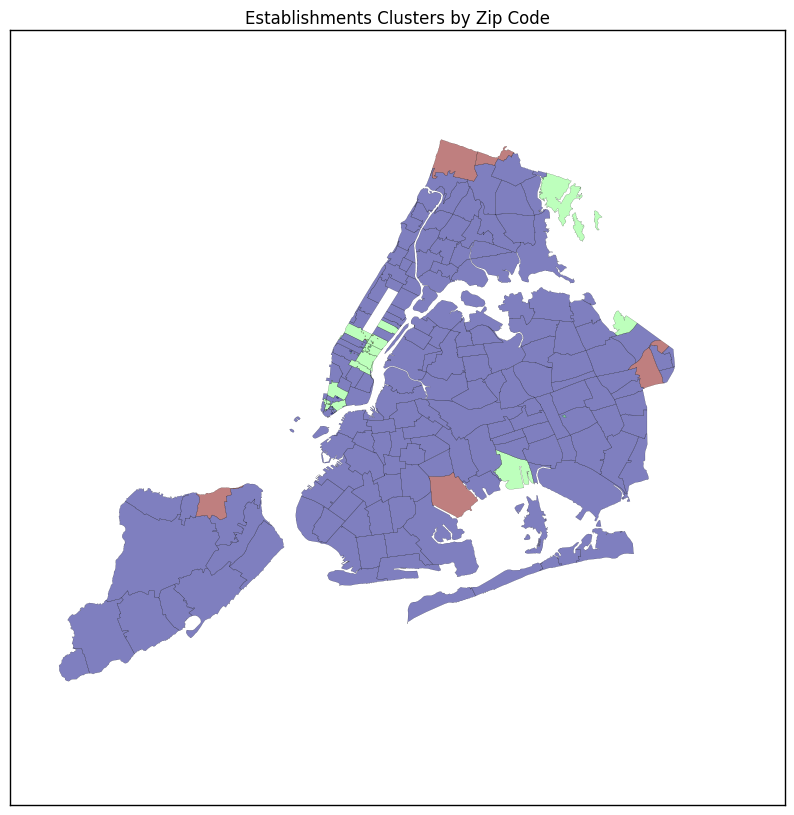

In [209]:
f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
geo_df.plot(column='cluster',linewidth=0.1,ax=ax)
plt.title("Establishments Clusters by Zip Code")

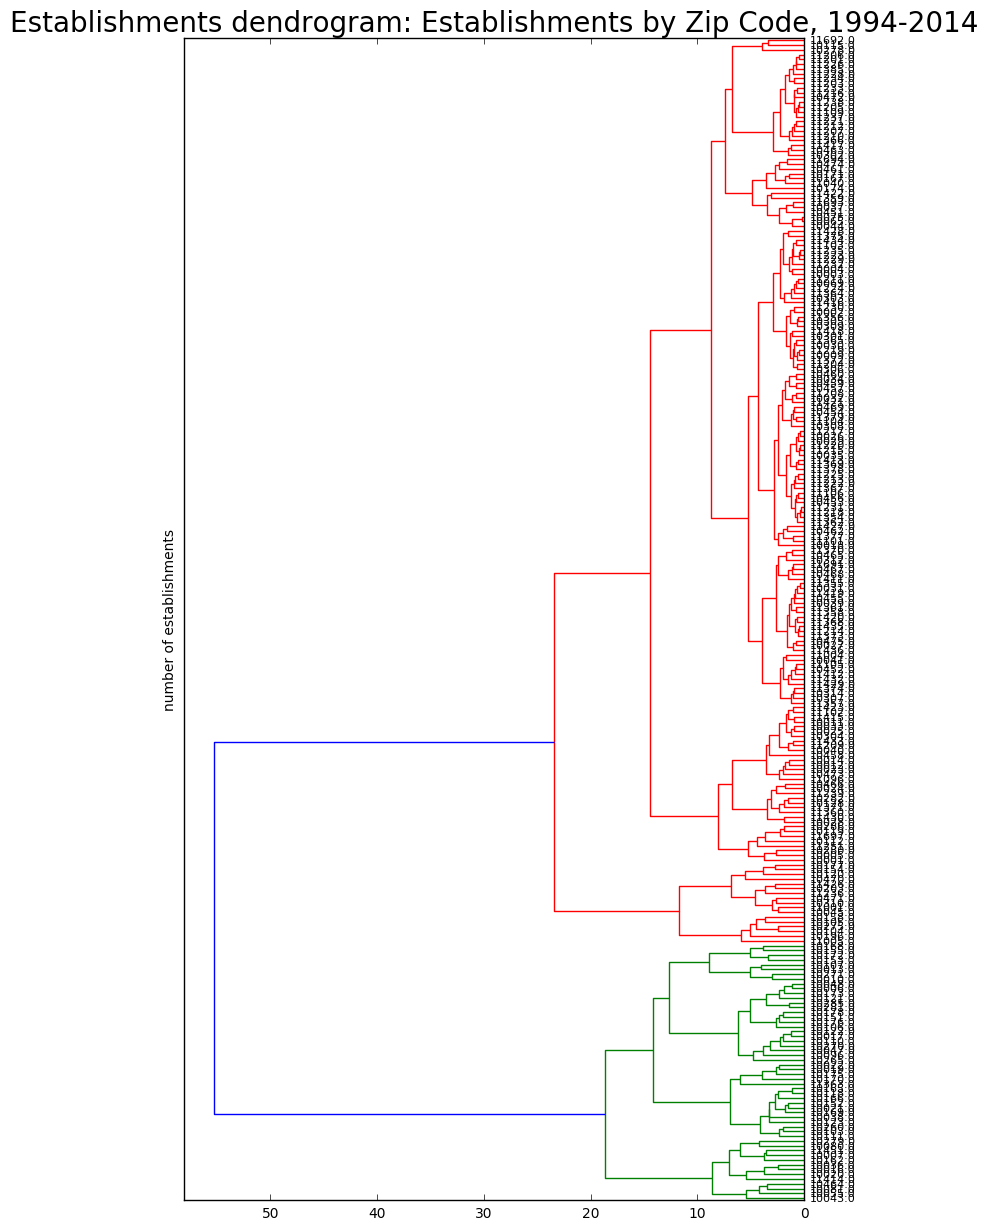

In [212]:
fig = pl.figure(figsize=(8, 15), dpi=150)
pl.ylabel("number of establishments")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(normed, method='ward'), orientation='left',
                               labels = normed.index.values,
                               #leaf_rotation=.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.grid('off')
title = pl.title("Establishments dendrogram: Establishments by Zip Code, 1994-2014", fontsize=20)
#this is a dendrogram for inspection of the hierarchical structure